In [1]:
import nfl_data_py as nfl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_2022 = nfl.import_pbp_data([2022]) ##this is pbp_2022 dataset in sql

##nfl.import_ngs_data('rushing', years) for RB_data

2022 done.
Downcasting floats.


In [3]:
for x in df_2022.columns:
    print(x)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


In [4]:
cols = ['rusher_player_name', 'rusher_player_id','play_id','week','down', 'yardline_100', 'ydstogo' ,'yards_gained', 'ep','epa', 'rush_touchdown']

In [5]:
runs_22 = df_2022.loc[(df_2022['season_type'] == 'REG') & (df_2022['play_type'] == 'run'), cols]
runs_22.loc[runs_22['rusher_player_name']=='K.Walker']
ids_22 = runs_22[['rusher_player_name', 'rusher_player_id']]
ids_22 = ids_22.drop_duplicates()
runs_22

,rusher_player_name,rusher_player_id,play_id,week,down,yardline_100,ydstogo,yards_gained,ep,epa,rush_touchdown
2,Mi.Carter,00-0036924,68.0,1,1.0,78.0,10.0,19.0,1.030577,1.468819,0.0
4,Mi.Carter,00-0036924,115.0,1,2.0,59.0,10.0,5.0,2.007203,-0.325931,0.0
9,L.Jackson,00-0034796,254.0,1,3.0,64.0,2.0,4.0,0.922567,0.895055,0.0
10,K.Drake,00-0033118,275.0,1,1.0,60.0,10.0,0.0,1.817623,-0.529274,0.0
12,K.Drake,00-0033118,330.0,1,3.0,52.0,2.0,1.0,1.699480,-1.866572,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47821,D.Henry,00-0032764,3363.0,18,1.0,69.0,10.0,3.0,1.335977,-0.355052,0.0
47822,D.Henry,00-0032764,3384.0,18,2.0,66.0,7.0,1.0,0.980925,-0.456378,0.0
47826,J.Dobbs,00-0033949,3473.0,18,1.0,75.0,10.0,11.0,0.916978,0.635348,0.0
47827,D.Henry,00-0032764,3499.0,18,1.0,64.0,10.0,9.0,1.552326,0.517224,0.0


In [6]:
top_runners = runs_22.groupby('rusher_player_name')[['yards_gained', 'rush_touchdown']].agg('sum')
top_runners = top_runners.loc[top_runners['yards_gained'] >= 1000]
top_runners = pd.merge(top_runners, ids_22, on='rusher_player_name')
top_runners = top_runners.rename(columns={'rusher_player_name':'name', 'rusher_player_id':'player_id'})
top_runners

,name,yards_gained,rush_touchdown,player_id
0,A.Jones,1121.0,2.0,00-0033293
1,C.McCaffrey,1139.0,8.0,00-0033280
2,D.Cook,1173.0,8.0,00-0033893
3,D.Henry,1538.0,13.0,00-0032764
4,J.Fields,1150.0,8.0,00-0036945
5,J.Jacobs,1653.0,12.0,00-0035700
6,Ja.Williams,1068.0,17.0,00-0033948
7,K.Walker,1050.0,9.0,00-0038134
8,M.Sanders,1269.0,11.0,00-0035243
9,N.Chubb,1527.0,12.0,00-0034791


In [7]:
roster = nfl.import_rosters([2022])
roster.loc[roster['player_name']=='Kenneth Walker', 'player_id']
pos = roster[['player_id', 'position']]
pos

,player_id,position
0,00-0029747,DB
1,00-0032560,DB
2,00-0032933,DB
3,00-0033890,DB
4,00-0033568,DB
...,...,...
2636,00-0036340,WR
2637,00-0036626,WR
2638,00-0036671,WR
2639,00-0037741,WR


In [8]:
top_runners = pd.merge(top_runners, pos, on='player_id')
top_runners

,name,yards_gained,rush_touchdown,player_id,position
0,A.Jones,1121.0,2.0,00-0033293,RB
1,C.McCaffrey,1139.0,8.0,00-0033280,RB
2,D.Cook,1173.0,8.0,00-0033893,RB
3,D.Henry,1538.0,13.0,00-0032764,RB
4,J.Fields,1150.0,8.0,00-0036945,QB
5,J.Jacobs,1653.0,12.0,00-0035700,RB
6,Ja.Williams,1068.0,17.0,00-0033948,RB
7,K.Walker,1050.0,9.0,00-0038134,RB
8,M.Sanders,1269.0,11.0,00-0035243,RB
9,N.Chubb,1527.0,12.0,00-0034791,RB


In [9]:
top_rbs = top_runners[top_runners['position']=='RB']
top_rbs

,name,yards_gained,rush_touchdown,player_id,position
0,A.Jones,1121.0,2.0,00-0033293,RB
1,C.McCaffrey,1139.0,8.0,00-0033280,RB
2,D.Cook,1173.0,8.0,00-0033893,RB
3,D.Henry,1538.0,13.0,00-0032764,RB
5,J.Jacobs,1653.0,12.0,00-0035700,RB
6,Ja.Williams,1068.0,17.0,00-0033948,RB
7,K.Walker,1050.0,9.0,00-0038134,RB
8,M.Sanders,1269.0,11.0,00-0035243,RB
9,N.Chubb,1527.0,12.0,00-0034791,RB
10,N.Harris,1034.0,7.0,00-0036893,RB


In [10]:
runs_by_top_rbs = runs_22[runs_22['rusher_player_name'].isin(top_rbs['name'])]
runs_by_top_rbs['rusher_player_name'].value_counts()
runs_by_top_rbs

,rusher_player_name,rusher_player_id,play_id,week,down,yardline_100,ydstogo,yards_gained,ep,epa,rush_touchdown
347,N.Chubb,00-0034791,158.0,1,1.0,65.0,10.0,11.0,1.423470,0.906599,0.0
349,N.Chubb,00-0034791,213.0,1,2.0,52.0,8.0,5.0,1.895356,-0.386453,0.0
351,N.Chubb,00-0034791,251.0,1,3.0,47.0,3.0,4.0,1.508902,1.090143,0.0
353,N.Chubb,00-0034791,296.0,1,2.0,37.0,4.0,1.0,2.955942,-0.623509,0.0
356,C.McCaffrey,00-0033280,361.0,1,1.0,64.0,10.0,4.0,2.481606,-0.214152,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47816,D.Henry,00-0032764,3249.0,18,2.0,85.0,5.0,2.0,0.184346,-0.579280,0.0
47818,D.Henry,00-0032764,3299.0,18,1.0,80.0,10.0,9.0,0.634272,0.787845,0.0
47821,D.Henry,00-0032764,3363.0,18,1.0,69.0,10.0,3.0,1.335977,-0.355052,0.0
47822,D.Henry,00-0032764,3384.0,18,2.0,66.0,7.0,1.0,0.980925,-0.456378,0.0


In [11]:
top_rbs_grouped = runs_by_top_rbs.groupby('rusher_player_name').agg(attempts=('rusher_player_id', 'count'),
                                                                    rushing_yards=('yards_gained','sum'),
                                                                    rushing_tds=('rush_touchdown', 'sum'),
                                                                    total_epa=('epa', 'sum'),
                                                                    positive_pct_epa=('epa', lambda x: (x>0).mean()))
top_rbs_grouped.sort_values(by='positive_pct_epa',ascending=False)

,attempts,rushing_yards,rushing_tds,total_epa,positive_pct_epa
rusher_player_name,,,,,
M.Sanders,260,1269.0,11.0,12.698614,0.488462
A.Jones,213,1121.0,2.0,12.084998,0.464789
J.Jacobs,341,1653.0,12.0,-1.681085,0.442815
N.Chubb,303,1527.0,12.0,14.278028,0.435644
T.Allgeier,211,1037.0,3.0,11.342580,0.431280
Ja.Williams,263,1068.0,17.0,-24.973522,0.429658
T.Etienne,221,1127.0,5.0,-8.693549,0.407240
R.Stevenson,210,1020.0,5.0,-9.571356,0.404762
N.Harris,272,1034.0,7.0,-28.651573,0.404412


In [12]:
def format_pct(x):
    return '{:.2%}'.format(x)

top_rbs_grouped['positive_pct_epa'] = top_rbs_grouped['positive_pct_epa'].map(format_pct)

In [13]:
top_rbs_grouped.sort_values(by='positive_pct_epa',ascending=False)

,attempts,rushing_yards,rushing_tds,total_epa,positive_pct_epa
rusher_player_name,,,,,
M.Sanders,260,1269.0,11.0,12.698614,48.85%
A.Jones,213,1121.0,2.0,12.084998,46.48%
J.Jacobs,341,1653.0,12.0,-1.681085,44.28%
N.Chubb,303,1527.0,12.0,14.278028,43.56%
T.Allgeier,211,1037.0,3.0,11.342580,43.13%
Ja.Williams,263,1068.0,17.0,-24.973522,42.97%
T.Etienne,221,1127.0,5.0,-8.693549,40.72%
R.Stevenson,210,1020.0,5.0,-9.571356,40.48%
N.Harris,272,1034.0,7.0,-28.651573,40.44%


In [19]:
kw = runs_by_top_rbs.loc[runs_by_top_rbs['rusher_player_name']=='K.Walker']
kw7 = kw.loc[kw['week']==7, ['rusher_player_name','week', 'play_id','down','yardline_100','ydstogo','yards_gained','ep','epa']]
kw7 = kw7.rename(columns={'ep':'team_ep_before_play'})
kw7['attempt_counter'] = range(1, len(kw7) + 1)
kw7['yard_counter'] = np.cumsum(kw7['yards_gained'])
kw7['epa_counter'] = np.cumsum(kw7['epa'])

In [20]:
kw7

,rusher_player_name,week,play_id,down,yardline_100,ydstogo,yards_gained,team_ep_before_play,epa,attempt_counter,yard_counter,epa_counter
18776,K.Walker,7,88.0,1.0,65.0,10.0,0.0,1.575059,-0.580195,1,0.0,-0.580195
18777,K.Walker,7,109.0,2.0,65.0,10.0,15.0,0.994864,1.734215,2,15.0,1.154020
18788,K.Walker,7,470.0,1.0,46.0,10.0,7.0,2.717575,0.307068,3,22.0,1.461088
18792,K.Walker,7,576.0,1.0,16.0,10.0,-4.0,4.900182,-1.255408,4,18.0,0.205680
18806,K.Walker,7,881.0,1.0,12.0,10.0,12.0,5.055352,1.944648,5,30.0,2.150329
18814,K.Walker,7,1052.0,1.0,19.0,10.0,1.0,4.586206,-0.353124,6,31.0,1.797204
18841,K.Walker,7,1637.0,1.0,75.0,10.0,8.0,1.514704,0.394342,7,39.0,2.191547
18842,K.Walker,7,1658.0,2.0,67.0,2.0,3.0,1.909046,0.248402,8,42.0,2.439948
18843,K.Walker,7,1679.0,1.0,64.0,10.0,2.0,2.157448,-0.421411,9,44.0,2.018537
18855,K.Walker,7,1987.0,1.0,34.0,10.0,2.0,3.699923,-0.443786,10,46.0,1.574751


In [ ]:
plt.plot(kw7['attempt_counter'],kw7['epa_counter'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative EPA')
plt.title('Kenneth Walker Cumulative Game EPA: Week 7')
plt.show()

In [ ]:
plt.plot(kw7['attempt_counter'],kw7['yard_counter'])
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative Rushing Yards')
plt.title('Kenneth Walker Cumulative Rushing Yards: Week 7')
plt.show()

In [16]:
kw18 = kw.loc[kw['week']==18, ['rusher_player_name','week', 'play_id','down','yardline_100','ydstogo','yards_gained','ep','epa']]
kw18 = kw18.rename(columns={'ep':'team_ep_before_play'})
kw18['attempt_counter'] = range(1, len(kw18) + 1)
kw18['yard_counter'] = np.cumsum(kw18['yards_gained'])
kw18['epa_counter'] = np.cumsum(kw18['epa'])
kw18

,rusher_player_name,week,play_id,down,yardline_100,ydstogo,yards_gained,team_ep_before_play,epa,attempt_counter,yard_counter,epa_counter
46633,K.Walker,18,187.0,1.0,75.0,10.0,5.0,1.534609,0.008928,1,5.0,0.008928
46634,K.Walker,18,208.0,2.0,70.0,5.0,9.0,1.543537,0.829967,2,14.0,0.838895
46636,K.Walker,18,260.0,2.0,58.0,7.0,1.0,2.072913,-0.691897,3,15.0,0.146998
46638,K.Walker,18,310.0,1.0,50.0,10.0,9.0,3.031503,0.675692,4,24.0,0.822691
46641,K.Walker,18,377.0,1.0,19.0,15.0,2.0,4.436559,-0.353988,5,26.0,0.468702
46650,K.Walker,18,557.0,1.0,49.0,10.0,4.0,3.036943,-0.206052,6,30.0,0.262650
46653,K.Walker,18,630.0,2.0,28.0,1.0,6.0,4.451782,0.323783,7,36.0,0.586434
46655,K.Walker,18,682.0,2.0,20.0,8.0,-1.0,4.303472,-0.681150,8,35.0,-0.094716
46670,K.Walker,18,1003.0,1.0,80.0,15.0,8.0,0.503383,0.366961,9,43.0,0.272245
46685,K.Walker,18,1366.0,1.0,69.0,10.0,-2.0,1.329678,-0.879633,10,41.0,-0.607389


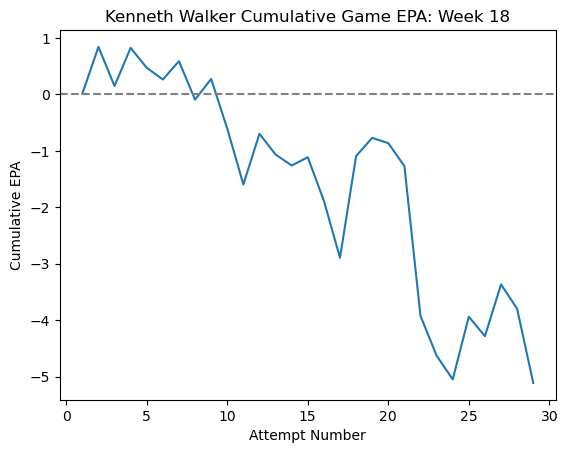

In [17]:
plt.plot(kw18['attempt_counter'],kw18['epa_counter'])
plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative EPA')
plt.title('Kenneth Walker Cumulative Game EPA: Week 18')
plt.show()

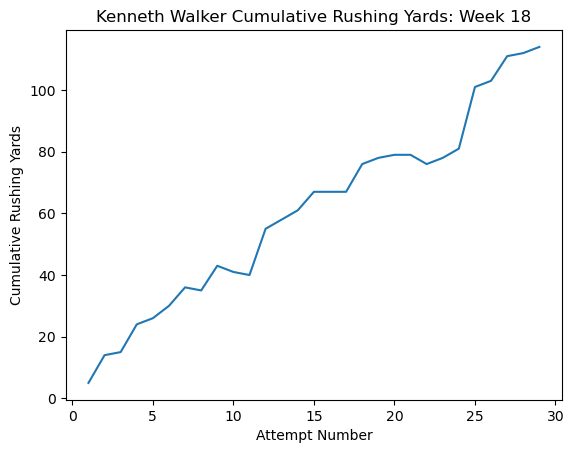

In [18]:
plt.plot(kw18['attempt_counter'],kw18['yard_counter'])
plt.xlabel('Attempt Number')
plt.ylabel('Cumulative Rushing Yards')
plt.title('Kenneth Walker Cumulative Rushing Yards: Week 18')
plt.show()

In [32]:
kw_10 = kw.loc[kw['yardline_100'] <= 10.0]
kw_10

,rusher_player_name,rusher_player_id,play_id,week,down,yardline_100,ydstogo,yards_gained,ep,epa,rush_touchdown
10959,K.Walker,00-0038134,3503.0,4,2.0,9.0,5.0,2.0,5.008211,-0.502383,0.0
14242,K.Walker,00-0038134,1216.0,6,3.0,7.0,2.0,-2.0,4.688499,-1.783444,0.0
18900,K.Walker,00-0038134,2987.0,7,2.0,6.0,6.0,-1.0,5.137220,-1.008067,0.0
20963,K.Walker,00-0038134,1155.0,8,1.0,3.0,3.0,0.0,6.143642,-0.412647,0.0
23664,K.Walker,00-0038134,1003.0,9,1.0,2.0,2.0,-2.0,6.255059,-0.826220,0.0
23764,K.Walker,00-0038134,3372.0,9,1.0,1.0,1.0,1.0,6.409039,0.590962,1.0
23795,K.Walker,00-0038134,4083.0,9,1.0,5.0,5.0,5.0,5.278776,1.721224,1.0
33977,K.Walker,00-0038134,1186.0,13,1.0,4.0,4.0,0.0,5.929771,-0.435297,0.0
44556,K.Walker,00-0038134,418.0,17,2.0,10.0,3.0,4.0,5.252364,0.544522,0.0
44557,K.Walker,00-0038134,439.0,17,1.0,6.0,6.0,2.0,5.796886,-0.099374,0.0


In [38]:
print(kw_10['epa'].sum()/kw_10['epa'].count())
print(kw_10['rush_touchdown'].sum()/kw_10['rush_touchdown'].count())

-0.43260493874549866
0.125


In [39]:
runs_by_top_rbs_10 = runs_by_top_rbs.loc[runs_by_top_rbs['yardline_100'] <= 10.0]
print(runs_by_top_rbs_10['epa'].sum()/runs_by_top_rbs_10['epa'].count())
print(runs_by_top_rbs_10['rush_touchdown'].sum()/runs_by_top_rbs_10['rush_touchdown'].count())

0.025602776327250915
0.26851851851851855
